In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
img = cv2.imread('/content/Chromosomes (1).jpg')

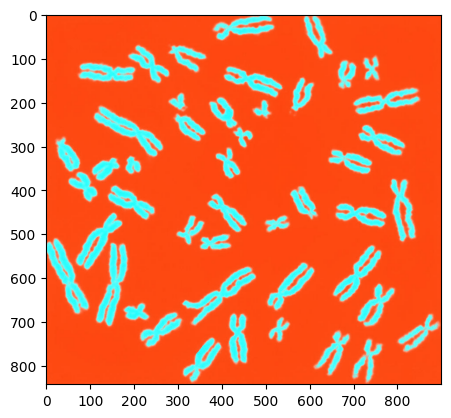

In [16]:
plt.imshow(img)

array([[79, 79, 79, ..., 80, 81, 81],
       [79, 79, 79, ..., 80, 80, 81],
       [79, 79, 79, ..., 79, 80, 80],
       ...,
       [83, 81, 79, ..., 82, 82, 82],
       [85, 83, 81, ..., 82, 82, 82],
       [85, 83, 81, ..., 82, 82, 82]], dtype=uint8)
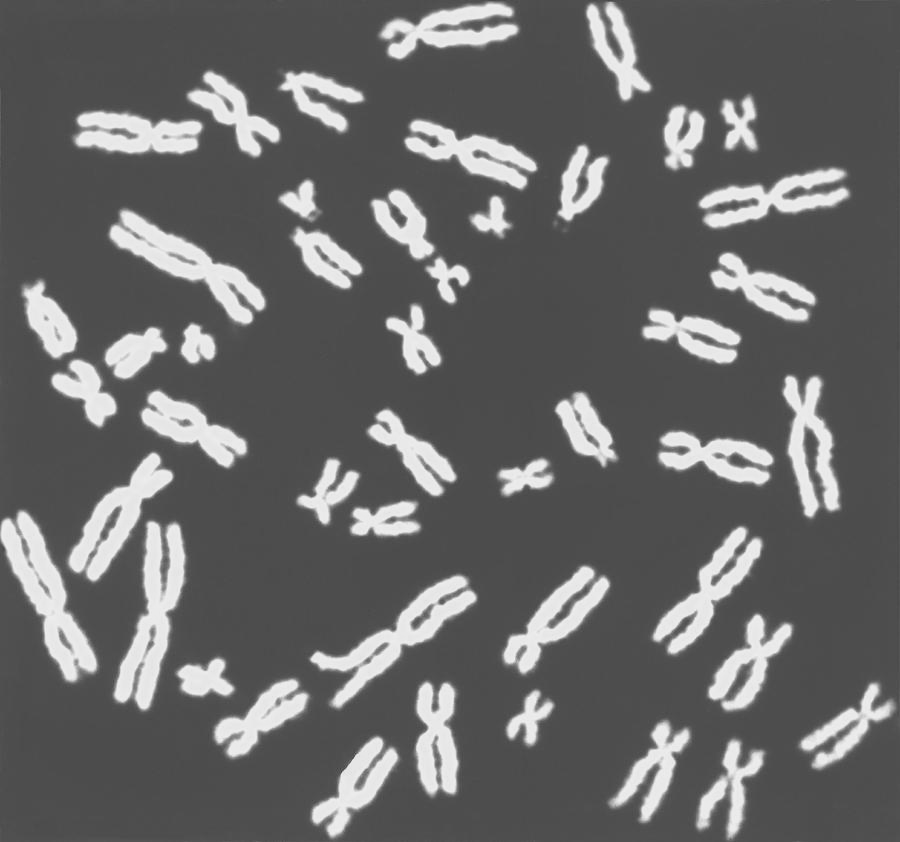

In [17]:
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

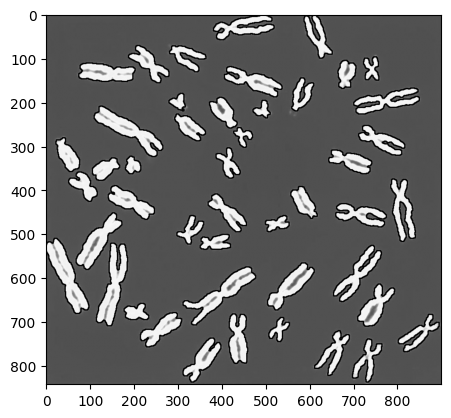

In [27]:
kernel = np.ones((5,5),np.uint8)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
opening = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, kernel)
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
_, bin = cv2.threshold(opening, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = gimg.copy()
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

plt.imshow(img_with_contours, cmap='gray')

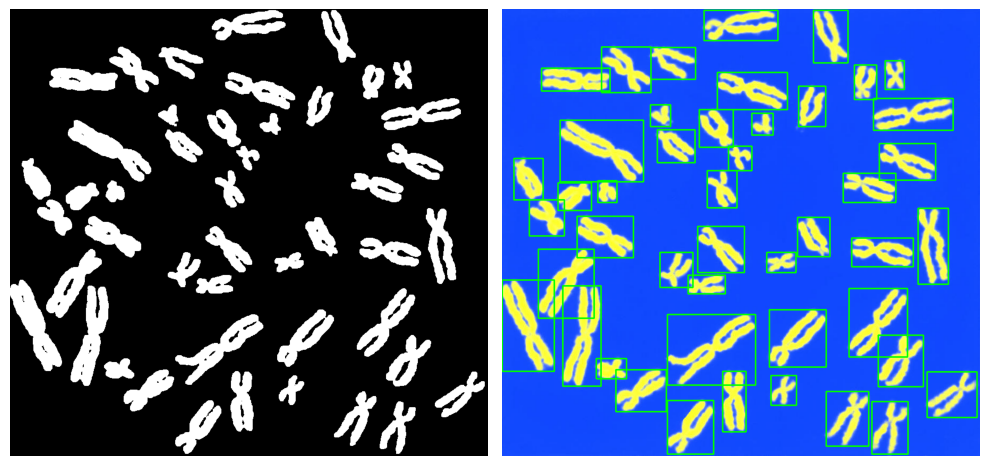

Features of detected contours:
    Height  Width       Shape    Area   Perimeter  Circularity
0       99     68    (99, 68)  2488.5  412.634556     0.183661
1      101     87   (101, 87)  3492.5  385.404108     0.295470
2      103     80   (103, 80)  2818.0  437.102592     0.185346
3       56     48    (56, 48)  1163.0  214.166520     0.318630
4       86     94    (86, 94)  2588.5  441.144223     0.167146
5      114     44   (114, 44)  3674.5  370.007140     0.337278
6       79     95    (79, 95)  3274.0  315.563488     0.413157
7       38     57    (38, 57)  1431.5  183.095453     0.536594
8       97     85    (97, 85)  3639.5  341.462984     0.392251
9      133    166  (133, 166)  5932.0  543.126977     0.252702
10     108    107  (108, 107)  4392.0  358.818322     0.428670
11     129    110  (129, 110)  4255.5  603.796025     0.146683
12     189     72   (189, 72)  6248.0  605.161468     0.214392
13     172     98   (172, 98)  6332.0  464.617312     0.368604
14      35     70    (35

In [28]:
features = []
threshold = 5

if len(contours) >= threshold:
    img_with_bboxes = img.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

        features.append({
            "Height": h,
            "Width": w,
            "Shape": (h, w),
            "Area": area,
            "Perimeter": perimeter,
            "Circularity": circularity,
        })

        cv2.rectangle(img_with_bboxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    features_df = pd.DataFrame(features)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_with_bboxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Features of detected contours:")
    print(features_df)
else:
    print(f"Number of contours ({len(contours)}) is less than the threshold ({threshold}).")


In [29]:
from sklearn.preprocessing import StandardScaler

if len(features) > 0:
    features_df = pd.DataFrame(features)
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features_df[["Height", "Width", "Area", "Perimeter", "Circularity"]])
    standardized_df = pd.DataFrame(standardized_features, columns=["Height", "Width", "Area", "Perimeter", "Circularity"])
    print("Standardized Features:")
    print(standardized_df)
else:
    print("No contours found. Skipping standardization.")



Standardized Features:
      Height     Width      Area  Perimeter  Circularity
0   0.538851 -0.403718 -0.299402   0.530183    -1.170675
1   0.596162  0.166314  0.402025   0.329132    -0.421609
2   0.653473 -0.043698 -0.069203   0.710838    -1.159382
3  -0.693342 -1.003752 -1.225441  -0.935169    -0.266451
4   0.166327  0.376325 -0.229539   0.740678    -1.281314
5   0.968686 -1.123758  0.529177   0.215451    -0.141518
6  -0.034262  0.406327  0.249374  -0.186523     0.366833
7  -1.209144 -0.733737 -1.037858  -1.164576     1.193802
8   0.481540  0.106310  0.504725   0.004701     0.226776
9   1.513143  2.536446  2.106341   1.493649    -0.708135
10  0.796752  0.766347  1.030446   0.132841     0.470762
11  1.398520  0.856352  0.935083   1.941587    -1.418407
12  3.117860 -0.283711  2.327110   1.951669    -0.964792
13  2.630714  0.496332  2.385795   0.913987     0.068351
14 -1.295111 -0.343715 -0.841192  -0.776319     0.195217
15 -1.209144 -0.793740 -1.226489  -1.201275     0.680815
16 -0.40

Report:
Q1: How can contour detection be used to identify objects in an image?

  -> Contours can first be used to highlight the edges of the image/objects we are trying to classify, geometric properties can be used to clasify objects. These edges can be used to distinguish between elements very easily.

• Q2: What is the importance of standardization of data? What difference did you observe
before and after standardization?

  -> Standardization is important when we want our data to have a mean of 0 and standard deviation of 1. It prevents the domination of those values which are too large over the rest of the values.

  Before standardization, the perimeter and area were overwhelming the other values but after standardization, they were of a similar scale.

• Q3: Let us consider one of the values in the width column is missing. How to handle this missing
value?

  -> We can either fill it with the mean of all values, the median of all values or interpolation. We can even discard it if its effect is negligable.


• Q4: What is the importance of data normalization? What difference did you observe before
and after normalization?

  -> Normalization is important as it rescales the data to a fixed range which we can set. It will ensure that all our features equally effect the data, and reduces the outliers.

  Before normalization, our data can have outliers and multiple different ranges, this may cause biased results.

  After normalization, our data will be within the same range and will make all of it directly comparable.


• Q5: How might you adapt the bounding box construction process to handle overlapping or
touching chromosomes

-> We can do this by first eroding the image till the boundaries of the intersecting elements are a comfortable distance apart. Then we can continue with the same steps we have used in this particular situation.